# Simulating community dynamics

This notebook explains how you can create a consumer resource model, simulate its dynamics, and calculate its community properties (like the species survival fraction) and stability.

In [25]:
# load modules

import os

# this needs to be changed
os.chdir("C:/Users/jamil/Documents/PhD/GitHub projects/Ecological-Dynamics-and-Community-Selection/" + \
         "Ecological-Dynamics/Consumer-Resource Models/consumer_resource_modules_3")

from models import Consumer_Resource_Model
from community_level_properties import max_le

from matplotlib import pyplot as plt
import numpy as np

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Create a consumer-resource model community

To create the consumer-resource model, you first need to create a Consumer_Resource_Model object. This involves instructing the function what type of model you'd like to construct (in this case we want to create a model where resources grow logistically), and what the species and resource pool sizes are. Here, we create a community with a species and resource pool size of 75.

Then, you call the *growth_consumption_rates* and *model_specific_rates* to generate rates from the statistical properties of model parameters.

In [26]:
# I'm going to store my model parameters (the statistical properties of the resource and species pool) in a dictionary for ease
parameters = dict(M = 75, S = 75, mu_c = 175, sigma_c = 1.6, mu_y = 1, sigma_y = 0.130639, b = 1, d = 1)

# Initiate community
community = Consumer_Resource_Model(model = "Self-limiting resource supply", # model type
                                    no_species = parameters['S'], # species pool size
                                    no_resources = parameters['M']) # resource pool size

# generate consumption rates and yield conversion factors, which are used to generate growth rates
community.growth_consumption_rates(method = 'growth function of consumption', # this function tells the class that consumption rates = c, growth = yc
                                   mu_c = parameters['mu_c']/parameters['M'],
                                   sigma_c = parameters['sigma_c']/np.sqrt(parameters['M']),
                                   mu_g = parameters['mu_y'], # we call mu_y mu_g here. It's just so the class knows that mu_y affects the growth rate 
                                   sigma_g = parameters['sigma_y'])

# generate death rates and intrinsic resource growth rates
community.model_specific_rates(death_method = 'constant', death_args = {'d' : parameters['d']}, # generate death rates with a fixed value d
                               resource_growth_method = 'constant', resource_growth_args = {'b' : parameters['b']}) # generate instrinsic growth rates with a fixed value b

In [27]:
# Inspect rates
print("consumption rates = ", community.consumption, "\n",
      "yield conversion factors = ", community.rue, "\n", # y
      "growth rates = ", community.growth, "\n",
      "death rates = ", community.d, "\n",
      "instrinsic resource growth rates = ", community.b, "\n")

consumption rates =  [[2.33305702 2.21297965 2.00899229 ... 2.3295543  2.49748432 2.45954991]
 [2.40048086 2.24563909 2.15909932 ... 2.04298129 2.44601341 2.10291779]
 [2.10510516 2.35638605 2.36083093 ... 1.85546999 2.43841537 2.3665343 ]
 ...
 [2.45250676 2.38431806 2.30645235 ... 2.11825907 2.03166708 2.36735127]
 [2.09361371 2.42117694 2.46875345 ... 2.33277259 2.2948551  2.26101685]
 [2.08528243 2.27210833 2.14270028 ... 2.50285912 2.60174976 2.28055135]] 
 yield conversion factors =  [[0.79987569 0.89448067 0.99338068 ... 0.90947696 0.88292614 0.92914123]
 [1.16567828 1.08482104 0.77215608 ... 1.22153726 1.07166317 1.16419372]
 [0.97966613 1.10238183 0.86910144 ... 0.98461453 1.469978   0.95283878]
 ...
 [0.87623516 1.09092769 0.98348503 ... 1.00921845 1.25755159 1.04114588]
 [1.07979649 0.98934432 0.63626147 ... 0.96490256 1.11612825 0.9923788 ]
 [0.97045937 0.92133204 0.84407018 ... 1.20897055 1.11997623 1.29271746]] 
 growth rates =  [[1.8661556  2.14718373 2.09117079 ... 2.23

For more details on how the parameter generating methods work, see:

In [22]:
print("Initialise community: ", community.__init__.__doc__, "\n",
      "Generating growth and consumption rates: ", community.growth_consumption_rates.__doc__, "\n",
      "Generating death and intrinsic resource growth rates: ", community.model_specific_rates.__doc__)

Initialise community:  
        
        Initiate model
        
        Parameters
        ----------
        no_species : int
            species pool size
        no_resources : int
            resource pool size

        Returns
        -------
        None.

         
 Generating growth and consumption rates:  
        
        Parameters
        ----------
        method : str
            Type of method used to generate growth and consumption rates.
            Options are:
                'coupled by rho' - growth and consumption linear functions,
                coupled by a parameter rho that controls their reciprocity
                See Blumenthal et al., 2024 for details.
                
                'growth function of consumption' - growth and consumtion are coupled
                by a yield conversion factor. consumption rates = c, growth = g*c,
                therefore mu_c and sigma_c are the mean and std. dev. in consumption,
                and mu_g and sigma_g

## Simulate community dynamics

To simulate community dynamics, call the *simulate_community* method.

In [23]:
community.simulate_community(t_end = 5000, 
                             no_init_cond = 1) # number of initial abundances to simulate from

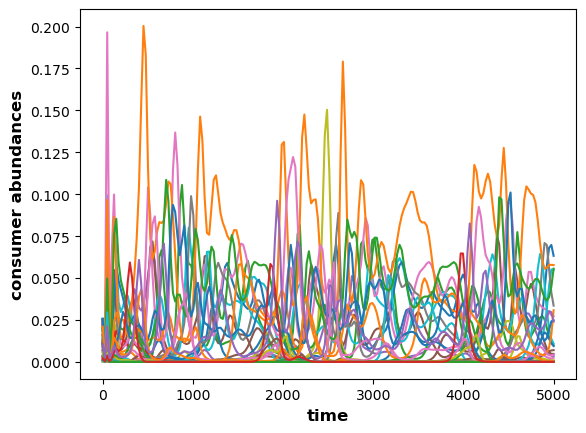

In [24]:
# plot species dynamics
plt.plot(community.ODE_sols[0].t, community.ODE_sols[0].y[:parameters['S'], :].T) # simulates are stored in the ODE_sols attribute
plt.xlabel('time', fontsize = 12, weight = "bold")
plt.ylabel('consumer abundances', fontsize = 12, weight = "bold")
plt.show()

For details on *simulate_community*, see

In [14]:
print("Simulation: ", community.simulate_community.__doc__)

Simulation:  
        
        Call methods that generate initial abundances and run simulations. 

        Parameters
        ----------
        t_end : float
            Simulation end time.
        no_init_cond : int
            number of sets of initial abundances to simulate from (no. repeats).
        init_cond_func : str, optional
            What function is used to generate the initial conditions. 
            The options: 
                "Mallmin" - Uniform(dispersal, 2/M)
                "user supplied" - supply your own intial abundances
            The default is 'Mallmin'.
        assign : Bool, optional
            Whether or not to assign simulations as object attributes. True for
            simulations, false for calculating lyapunov exponents. 
            The default is True.
        **kwargs : dict
            Optional argument for initial condition function. Of the form
            {'user_supplied_init_cond' : [array of initial abundances]}

        Returns
     

## Calculate community properties

To calculate community properties described by the self-consistency equations, call the *calculate_community_properties* method.
To numerically estimate the maximum lyapunov exponent, call the *max_le* function.

In [57]:
# calculate the species and resource survival fractions, average abundances and fluctuations in their abundances at the end of simulations
community.calculate_community_properties()
print("Consumer survival fraction = ", community.species_survival_fraction,
      ", average abundance = ", community.species_avg_abundance,
      ", fluctuations in abundance = ", community.species_abundance_fluctuations, "\n",
      "Resource survival fraction = ", community.resource_survival_fraction,
      ", average abundance = ", community.resource_avg_abundance,
      ", fluctuations in abundance = ", community.resource_abundance_fluctuations)

# calculate the maximum lyapunov exponent
community.lyapunov_exponent = max_le(community,
                                     T = 500, # max. time to run process for 
                                     initial_conditions = community.ODE_sols[0].y[:, -1], # initial abundances to start calculation
                                     dt = 20, # time after perturbation until the difference between the initial and perturbed trajectories are calculated
                                     separation = 1e-3) # perturbation size

print("Maximum Lyapunov exponent = ", community.lyapunov_exponent)

Consumer survival fraction =  [0.29333333333333333] , average abundance =  [0.005670148816158802] , fluctuations in abundance =  [0.0002426399313593861] 
 Resource survival fraction =  [0.5733333333333334] , average abundance =  [0.005619000010358247] , fluctuations in abundance =  [0.00012826350343858554]
Maximum Lyapunov exponent =  0.0032398211312010847


## Increasing the resource pool size stabilises community dynamics

Here, we compare the dynamics of a community with a resource pool size of 225 with the original community of M = 75.
We can see that community dynamics transition from fluctuating to stable with increasing resource pool size.

In [58]:
parameters_large = parameters | dict(M = 225, S = 225) # same parameters, but with a larger resource pool

community_large = Consumer_Resource_Model(model = "Self-limiting resource supply",
                                          no_species = parameters_large['S'],
                                          no_resources = parameters_large['M'])

community_large.growth_consumption_rates(method = 'growth function of consumption',
                                         mu_c = parameters_large['mu_c']/parameters_large['M'],
                                         sigma_c = parameters_large['sigma_c']/np.sqrt(parameters_large['M']),
                                         mu_g = parameters_large['mu_y'],
                                         sigma_g = parameters_large['sigma_y'])

community_large.model_specific_rates(death_method = 'constant', death_args = {'d' : parameters_large['d']},
                                     resource_growth_method = 'constant', resource_growth_args = {'b' : parameters_large['b']})

community_large.simulate_community(t_end = 5000,
                                   no_init_cond = 1)

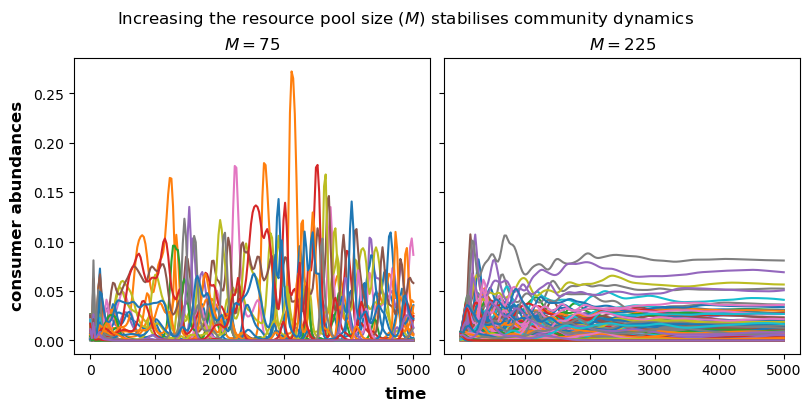

In [59]:
fig, axs = plt.subplots(1, 2, figsize = (8, 4), sharex = True, sharey = True, layout = "constrained")

fig.supxlabel('time', fontsize = 12, weight = "bold")
fig.supylabel('consumer abundances', fontsize = 12, weight = "bold")
fig.suptitle("Increasing the resource pool size " + r'$(M)$' + " stabilises community dynamics") 

axs[0].plot(community.ODE_sols[0].t, community.ODE_sols[0].y[:parameters['S'], :].T)
axs[0].set_title(r'$M = 75$', fontsize = 12, weight = "bold")

axs[1].plot(community_large.ODE_sols[0].t, community_large.ODE_sols[0].y[:parameters_large['S'], :].T)
axs[1].set_title(r'$M = 225$', fontsize = 12, weight = "bold")

plt.show()